# Import Libraries

In [7]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import time

# Data preprocessing

In [8]:
# load the datasheet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# transform the y data to categorical
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# x data normalisation
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

length_training = int(0.8 * len(x_train))
length_testing = int(0.2 * len(x_train))

x_train, x_validation = tf.split(x_train, [length_training, length_testing], 0)
y_train, y_validation = tf.split(y_train, [length_training, length_testing], 0)



# Hyperparameters

In [ ]:
batch_sizes_baseline = [256, length_training]
epochs = 100
batch_size = 256
rho = [0.01, 0.99]
learning_rate_rms = 0.001
learning_rate_sgd = 0.01

# Baseline Model

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4087 - categorical_accuracy: 0.8812 - val_loss: 0.2212 - val_categorical_accuracy: 0.9330
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1740 - categorical_accuracy: 0.9481 - val_loss: 0.1615 - val_categorical_accuracy: 0.9510
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1183 - categorical_accuracy: 0.9644 - val_loss: 0.1174 - val_categorical_accuracy: 0.9641
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0876 - categorical_accuracy: 0.9732 - val_loss: 0.1271 - val_categorical_accuracy: 0.9617
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0682 - categorical_accuracy: 0.9795 - val_loss: 0.0916 - val_categorical_accuracy: 0.9736
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0559 - categorical_accuracy: 0.9826 - val_loss: 0.1071 - val_categorical_accuracy: 0.969

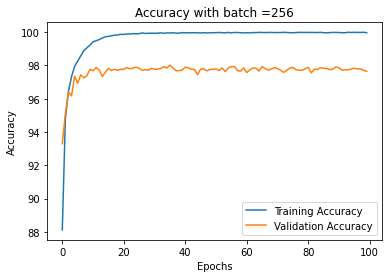

73.5580677986145
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3284 - categorical_accuracy: 0.1043 - val_loss: 2.0180 - val_categorical_accuracy: 0.5076
Epoch 2/100
1/1 [==============================] - 0s 269ms/step - loss: 2.0252 - categorical_accuracy: 0.4934 - val_loss: 1.7182 - val_categorical_accuracy: 0.6392
Epoch 3/100
1/1 [==============================] - 0s 281ms/step - loss: 1.7302 - categorical_accuracy: 0.6291 - val_loss: 1.4204 - val_categorical_accuracy: 0.7609
Epoch 4/100
1/1 [==============================] - 0s 319ms/step - loss: 1.4431 - categorical_accuracy: 0.7370 - val_loss: 1.2533 - val_categorical_accuracy: 0.6769
Epoch 5/100
1/1 [==============================] - 0s 316ms/step - loss: 1.2802 - categorical_accuracy: 0.6661 - val_loss: 1.2453 - val_categorical_accuracy: 0.6608
Epoch 6/100
1/1 [==============================] - 0s 272ms/step - loss: 1.2781 - categorical_accuracy: 0.6407 - val_loss: 1.0200 - val_categorical_accuracy: 0.7

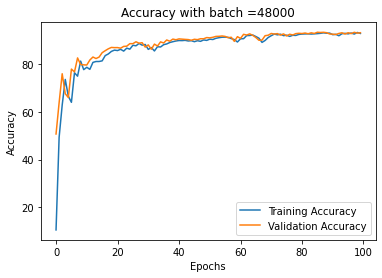

32.524380683898926


In [9]:
for batch in batch_sizes_baseline:
    start = time.time()
    model_baseline = Sequential()
    model_baseline.add(Flatten(input_shape=(28, 28)))
    model_baseline.add(Dense(128, activation='relu'))
    model_baseline.add(Dense(256, activation='relu'))
    model_baseline.add(Dense(10, activation='softmax'))
    model_baseline.compile(loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model = model_baseline.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_data=(x_validation, y_validation))

    train_accuracy = [fit_model.history['categorical_accuracy'][i] * 100 for i in range(100)]
    validation_accuracy = [fit_model.history['val_categorical_accuracy'][i] * 100 for i in range(100)]
    print(train_accuracy)

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with batch =' + str(batch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.show()
    print(time.time() - start)

# RMSProp